## Cluster Growth

Diffusion and cluster growth are opposite processes.  Here we calculate a cluster using the Eden model (cancer-like).  The idea is to start with a nucleation center, and allow new sites to be occupied that are on the boundary of old sites.  The trick is to keep track of which sites are occupied, which available for occupation, and which are stagnant.

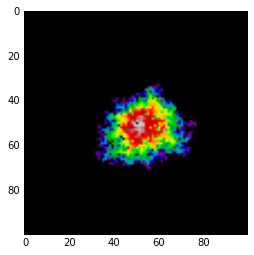

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#########################################

ncells=1024  #number of sites to fill
nside=100    #width of the grid
#create an array of index increments for use in populating sites

neighbors=np.array([
    (0, 1), 
    (0, -1), 
    (1, 0), 
    (-1, 0)
])

body=np.zeros((nside,nside))-1  #array holding the cell occupancy counter (-1=empty; 0 = candidate; 1=filled)
age=np.zeros((nside,nside))    #make an array that holds the step number for which the cell is occupied

ctr=int(nside/2)
body[ctr,ctr] = 1
for near in neighbors:
    body[ctr+near[0],ctr+near[1]] = 0

for i in range(ncells-1):
    gsites = np.where(body==0)
    nget=np.random.choice(gsites[0].size)
    curx=gsites[0][nget]
    cury=gsites[1][nget]
    body[curx,cury] = 1
    age[curx,cury]= ncells-i   #record the age for the filled site at the end of the run
    
   # fill=np.random.choice(gsites)
    for near in neighbors:    #now check the neighbors, and if -1 change to 0
        if body[curx+near[0],cury+near[1]] == -1:
            body[curx+near[0],cury+near[1]] = 0

unfilled=np.where(body == -1)  #find non-filled/non-candidate sites
body[unfilled] = 0             #set them equal to zero
#print(gsites)

plt.imshow(age,cmap=plt.cm.spectral)
#plt.imshow(age,cmap=plt.cm.YlOrRd_r)
#Find some colormap names at https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
#Adding _r to the colormap name reverses the map
#plt.gray()
plt.show()    